<a href="https://colab.research.google.com/github/wira29/2141720184_machine-learning_2023/blob/main/minggu-12/Tugas_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive;

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


In [ ]:
import cv2
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow

def rotate_image(image_path):
    # Baca gambar
    image = cv2.imread(image_path)

    # Ubah gambar ke skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Deteksi tepi menggunakan Canny
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    # Temukan garis-garis menggunakan transformasi garis Hough
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

    # Hitung sudut rotasi rata-rata dari garis-garis yang terdeteksi
    angles = []
    for line in lines:
        for rho, theta in line:
            angle = theta * 180 / np.pi
            angles.append(angle)

    # Hitung sudut rata-rata
    mean_angle = np.mean(angles)

    # Rotasi gambar
    rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

    # Tampilkan gambar yang telah dirotasi
    cv2_imshow(rotated_image)

    # Pengenalan teks menggunakan tesseract
    rotated_text = pytesseract.image_to_string(rotated_image)
    print("Rotated Text:\n", rotated_text)

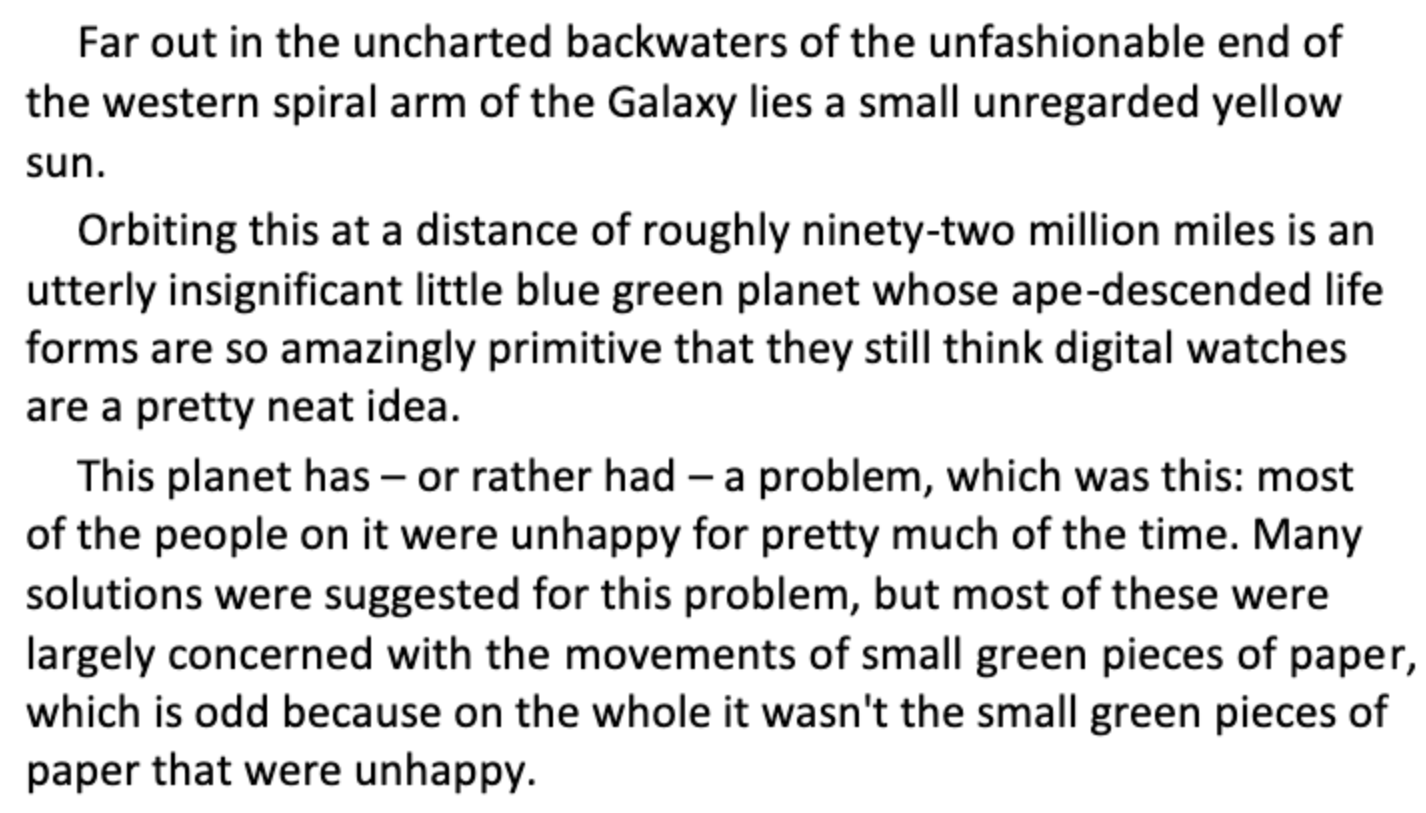

Rotated Text:
 Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had — a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.



In [30]:
image_path = "drive/MyDrive/ML/images/hitchhikers-rotated.png"
rotate_image(image_path)